<a href="https://colab.research.google.com/github/js621/ML1/blob/main/Pneumonia_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#to mount data from my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
#from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
# re-size all the images to this
# defining path for training and validation sets
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/Colab Notebooks/Data Analysis projects/Data_Project_1/train/'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Data Analysis projects/Data_Project_1/test/'

In [5]:
import os
print(os.listdir(train_path))
print(os.listdir(valid_path))

['NORMAL', 'PNEUMONIA']
['PNEUMONIA', 'NORMAL']


In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
#vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
#preprosing for ResNet 50
resnet_model = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
# don't train existing weights
#VGG
for layer in vgg.layers:
    layer.trainable = False

#ResNet
for layer in resnet_model.layers:
    layer.trainable = False

In [9]:
# useful for getting number of output classes
folders = os.listdir(train_path)
#folders = glob('/content/drive/MyDrive/Colab Notebooks/Data Analysis projects/Data_Project_1/train')

In [10]:
#Connecting to classification layer
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)


# Resnet
x1 = Flatten()(resnet_model.output)
prediction1 = Dense(len(folders), activation='softmax')(x1)


# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

model1 = Model(inputs=resnet_model.input, outputs=prediction1)





In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# modelling Res Net

model1.compile(
  loss='categorical_crossentropy',  # Add the loss function
  optimizer='adam',                # Add optimizer if desired
  metrics=['accuracy']             # Add metrics if desired
)


In [12]:


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [15]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 903s 5s/step - accuracy: 0.8460 - loss: 0.4837 - val_accuracy: 0.8942 - val_loss: 0.3130
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 154s 823ms/step - accuracy: 0.9563 - loss: 0.1178 - val_accuracy: 0.9215 - val_loss: 0.2584
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 145s 840ms/step - accuracy: 0.9647 - loss: 0.0951 - val_accuracy: 0.8990 - val_loss: 0.3528
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 136s 833ms/step - accuracy: 0.9645 - loss: 0.0895 - val_accuracy: 0.8269 - val_loss: 0.6564
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 823ms/step - accuracy: 0.9697 - loss: 0.0791 - val_accuracy: 0.8590 - val_loss: 0.5515


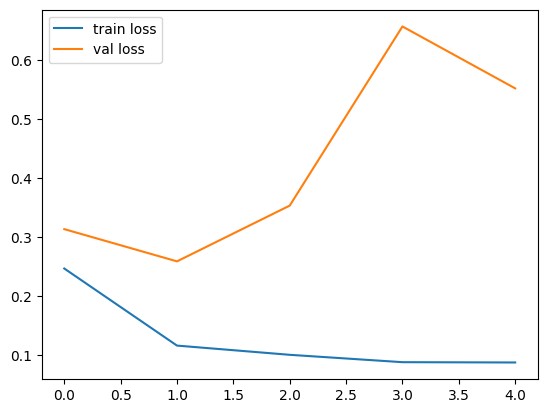

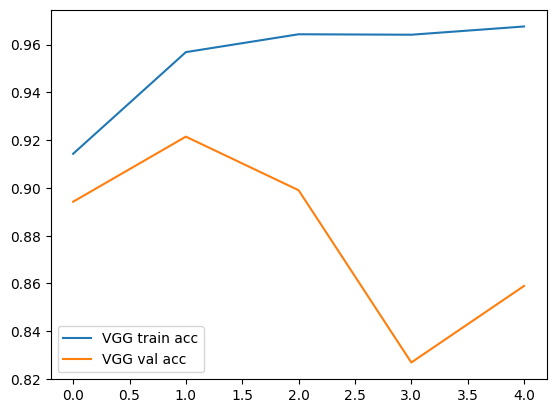

<Figure size 640x480 with 0 Axes>

In [16]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='VGG train acc')
plt.plot(r.history['val_accuracy'], label='VGG val acc')

plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
r1 = model1.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 152s 849ms/step - accuracy: 0.7247 - loss: 1.3364 - val_accuracy: 0.6554 - val_loss: 0.9706
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 129s 792ms/step - accuracy: 0.8502 - loss: 0.3422 - val_accuracy: 0.7452 - val_loss: 0.6226
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 800ms/step - accuracy: 0.8577 - loss: 0.3355 - val_accuracy: 0.7260 - val_loss: 0.6993
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 132s 808ms/step - accuracy: 0.8685 - loss: 0.3528 - val_accuracy: 0.8782 - val_loss: 0.3030
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 132s 811ms/step - accuracy: 0.8679 - loss: 0.3557 - val_accuracy: 0.8157 - val_loss: 0.4528


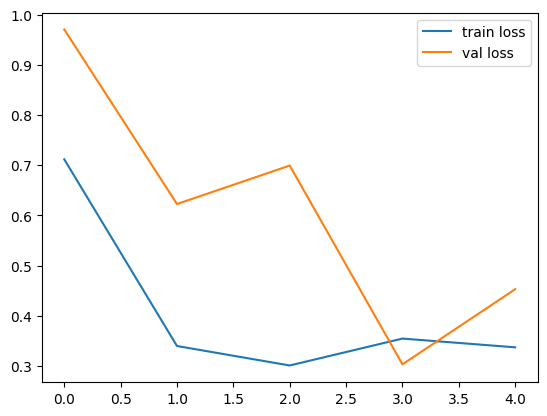

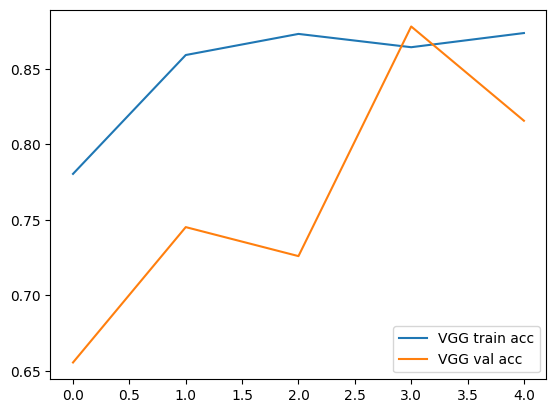

<Figure size 640x480 with 0 Axes>

In [18]:
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r1.history['accuracy'], label='VGG train acc')
plt.plot(r1.history['val_accuracy'], label='VGG val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

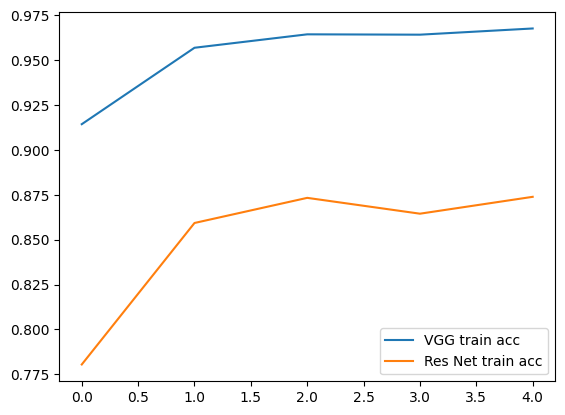

<Figure size 640x480 with 0 Axes>

In [21]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='VGG train acc')
#plt.plot(r.history['val_accuracy'], label='VGG val acc')
plt.plot(r1.history['accuracy'], label='Res Net train acc')
#plt.plot(r1.history['val_accuracy'], label='Res Net val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_comp')

In [20]:
import tensorflow as tf

from keras.models import load_model

model.save('model.h5')